<a href="https://colab.research.google.com/github/maulananadzif/DataScience_Bimbingan_Karir/blob/main/BK_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BK - Data Science

A11.2020.12908 - Maulana Nadzif Adnan



# **1) Pengumpulan Data**

dataset yang akan digunakan disini diperoleh dari https://archive.ics.uci.edu/dataset/45/heart+disease dan dataset pada penilitian ini adalah Hungarian.data

# **2) Menelaah Data**

In [1125]:
import pandas as pd # digunakan untuk manipulasi dan analisis data
import re # digunakan untuk pencarian dan manipulasi string
import numpy as np # digunakan untuk operasi numerik dan komputasi array
import itertools # untuk pembuatan dan pengelolaan iterasi

In [1126]:
# Load Dataset

# Import library drive dari Google Colab untuk mengakses Google Drive
from google.colab import drive

# Mount Google Drive ke dalam environment Colab
drive.mount('/content/drive')

# Tentukan path direktori dataset di Google Drive
dir = "/content/drive/My Drive/BK/Dataset/hungarian.data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1127]:
# Membuka file dataset menggunakan perintah open
with open(dir, encoding='Latin1') as file:
  # Membaca setiap baris dari file dan menyimpannya dalam list 'lines'
  lines = [line.strip() for line in file]

# Mencetak 10 baris pertama dari list 'lines'
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [1128]:
# Menggunakan itertools.takewhile untuk mengambil baris-baris data yang panjangnya 76 karakter
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

# Membentuk DataFrame dari data menggunakan pd.DataFrame.from_records
df = pd.DataFrame.from_records(data)

# Menampilkan 5 baris pertama dari DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [1129]:
# Menampilkan informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [1130]:
# Mengambil semua baris dan kolom kecuali kolom terakhir
df = df.iloc[:, :-1]

# Menghapus kolom pertama dari DataFrame
df = df.drop(df.columns[0], axis=1)

In [1131]:
# Mengubah tipe data semua kolom menjadi float
df = df.astype(float)

# Menampilkan informasi tentang DataFrame setelah perubahan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

# **3) Validasi Data**

Pada tahap ini, tujuannya adalah untuk mendapatkan pemahaman yang baik tentang isi dataset agar penanganan data dapat dilakukan sesuai dengan kondisinya.

In [1132]:
# Menggantikan nilai -9.0 dengan NaN dalam DataFrame
df.replace(-9.0, np.nan, inplace=True)

# Menghitung jumlah nilai NaN dalam setiap kolom
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [1133]:
# Menampilkan beberapa baris pertama dari DataFrame
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [1134]:
# Menampilkan informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

# **4) Menentukan Object Data**

Pemilihan 14 fitur dilakukan berdasarkan deskripsi dataset.

In [1135]:
# Memilih kolom-kolom tertentu dari DataFrame df
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]

# Menampilkan beberapa baris pertama dari DataFrame yang baru
df_selected.head()


,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [1136]:
# Menampilkan informasi tentang DataFrame yang baru
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [1137]:
# Dictionary yang berisi mapping antara indeks kolom dan nama baru
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

# Mengganti nama kolom dalam DataFrame df_selected
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-1137-579d8313151a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [1138]:
# Menampilkan informasi tentang DataFrame yang baru setelah penggantian nama kolom
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [1139]:
# Menghitung jumlah fitur pada dataset
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

# **5) Membersihkan Data**

Sebelum melibatkan data dalam proses pemodelan, langkah pembersihan data dilakukan untuk memastikan bahwa model yang dihasilkan lebih akurat.

In [1140]:
# Menghitung jumlah nilai null (NaN) dalam setiap kolom
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [1141]:
# Daftar kolom yang akan dihapus
columns_to_drop = ['ca', 'slope', 'thal']

# Menghapus kolom-kolom tertentu dari DataFrame df_selected
df_selected = df_selected.drop(columns=columns_to_drop, axis=1)

# Menampilkan jumlah nilai null (NaN) dalam setiap kolom setelah penghapusan
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [1142]:
# Mengambil kolom-kolom tertentu dan menghapus nilai null (NaN)
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

# Mengubah tipe data menjadi float
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

# Menghitung nilai rata-rata untuk masing-masing kolom
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

In [1143]:
# Dictionary yang berisi nilai rata-rata untuk masing-masing kolom
fill_values = {
    'trestbps': meanTBPS,
    'chol': meanChol,
    'fbs': meanfbs,
    'thalach': meanthalach,
    'exang': meanexang,
    'restecg': meanRestCG
}

# Mengisi nilai null (NaN) dalam DataFrame df_selected dengan nilai rata-rata
dfClean = df_selected.fillna(value=fill_values)

# Menampilkan informasi tentang DataFrame yang telah diisi nilai null
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [1144]:
# Menampilkan jumlah nilai null setelah pengisian
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [1145]:
# Mengidentifikasi baris-baris yang duplikat
duplicate_rows = dfClean.duplicated()

# Menampilkan baris-baris yang duplikat (jika ada)
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [1146]:
# Menampilkan semua baris yang memiliki duplikat
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [1147]:
# Menghapus semua baris yang memiliki duplikat
dfClean = dfClean.drop_duplicates()

# Menampilkan baris-baris yang memiliki duplikat setelah penghapusan (harusnya kosong)
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [1148]:
# Menampilkan beberapa baris pertama dari DataFrame dfClean setelah penghapusan duplikat
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [1149]:
# Menghitung frekuensi setiap nilai dalam kolom 'target'
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [1150]:
# untuk membuat visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

In [1151]:
# Menghitung matriks korelasi antar kolom-kolom numerik dalam DataFrame dfClean
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

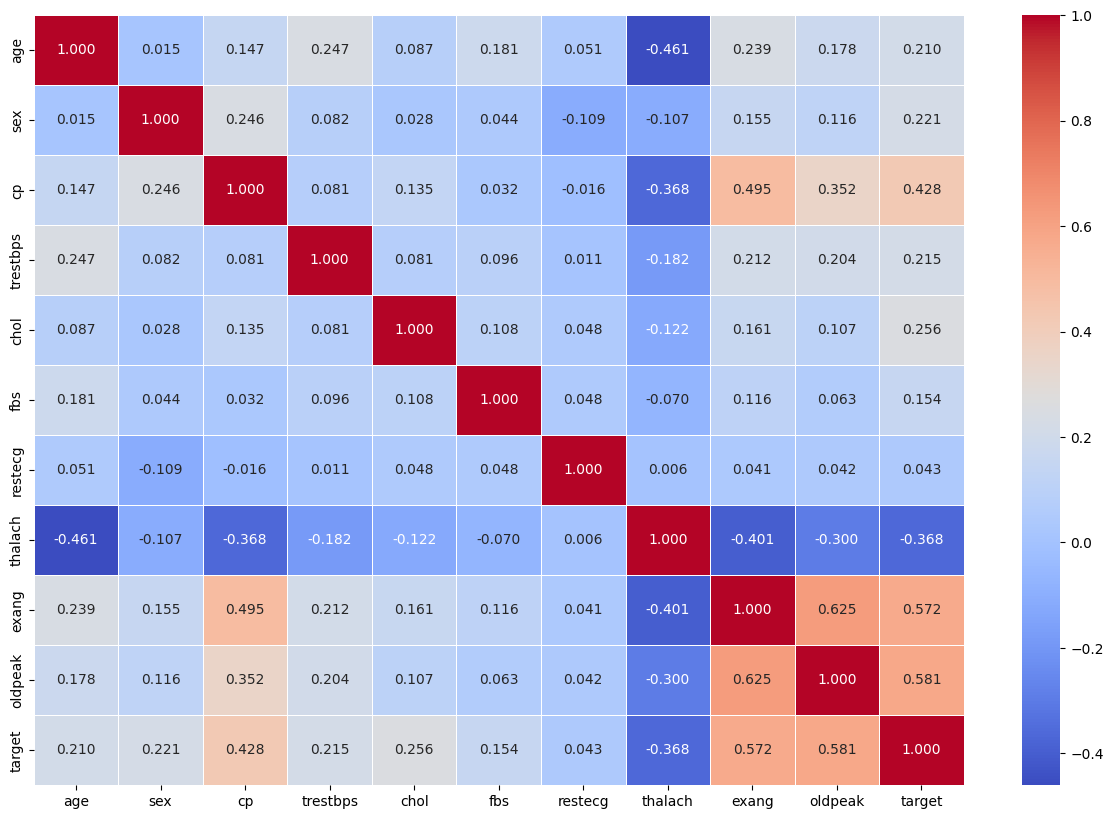

In [1152]:
# Menghitung matriks korelasi antar kolom-kolom numerik dalam DataFrame dfClean
cor_mat = dfClean.corr()

# Membuat subplot dan mengatur ukuran gambar
fig, ax = plt.subplots(figsize=(15, 10))

# Membuat heatmap dengan nilai korelasi dan menambahkan anotasi
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f", cmap="coolwarm")

# **6) Konstruksi Data**

In [1153]:
# Menampilkan informasi tentang tipe data setiap kolom dalam DataFrame dfClean
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [1154]:
# Menampilkan lima baris pertama dari DataFrame dfClean
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [1155]:
# Memisahkan variabel independen (X) dan variabel dependen (y) dari DataFrame dfClean
X = dfClean.drop("target", axis=1).values  # Variabel independen, menghapus kolom 'target'
y = dfClean.iloc[:, -1]  # Variabel dependen, mengambil kolom 'target'

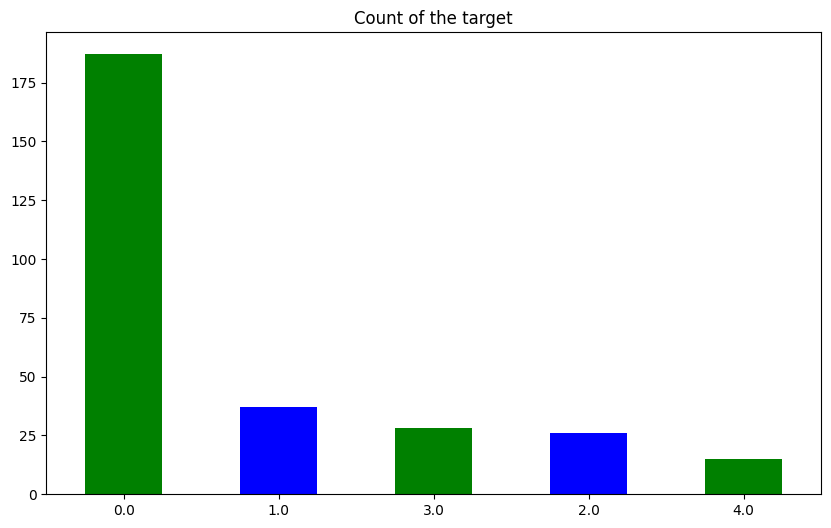

In [1156]:
# Membuat diagram batang untuk menampilkan jumlah setiap nilai dalam kolom 'target'
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])

# Menambahkan judul dan mengatur label sumbu x
plt.title("Count of the target")
plt.xticks(rotation=0);

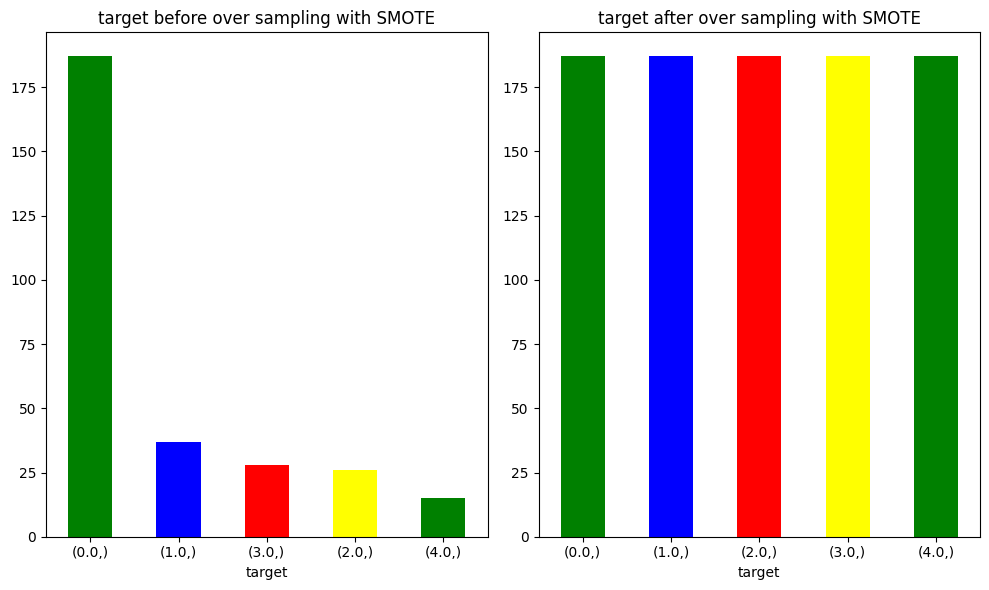

In [1157]:
from imblearn.over_sampling import SMOTE

# Inisialisasi metode oversampling SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling menggunakan SMOTE
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

# Membuat subplots untuk menampilkan diagram batang sebelum dan setelah oversampling
plt.figure(figsize=(12, 4))

# Subplot 1: Diagram batang sebelum oversampling
plt.subplot(1, 2, 1)
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target before over sampling with SMOTE")
plt.xticks(rotation=0)

# Subplot 2: Diagram batang setelah oversampling
plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0)

# Menyesuaikan tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

In [1158]:
# Membuat DataFrame baru (new_df1) dari variabel dependen (y)
new_df1 = pd.DataFrame(data=y)

# Menghitung frekuensi setiap nilai dalam kolom 'target' pada DataFrame new_df1
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [1159]:
# Membuat DataFrame baru (new_df2) dari variabel dependen (y_smote_resampled) setelah oversampling
new_df2 = pd.DataFrame(data=y_smote_resampled)

# Menghitung frekuensi setiap nilai dalam kolom 'target' pada DataFrame new_df2 setelah oversampling
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

In [1160]:
# Menampilkan statistik deskriptif ringkas dari DataFrame dfClean
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [1161]:
# Mengimpor MinMaxScaler dari sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data menggunakan MinMaxScaler pada X_smote_resampled
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

# Menampilkan panjang data setelah normalisasi
len(X_smote_resampled_normal)

935

In [1162]:
# Membuat DataFrame baru (dfcek1) dari data yang telah dinormalisasi (X_smote_resampled_normal)
dfcek1 = pd.DataFrame(X_smote_resampled_normal)

# Menampilkan statistik deskriptif ringkas dari DataFrame dfcek1
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1163]:
# Mengimpor train_test_split dari sklearn.model_selection
from sklearn.model_selection import train_test_split

# Memisahkan data yang telah di-oversample ke dalam data train dan test
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# Memisahkan data yang telah di-oversample dan dinormalisasi ke dalam data train dan test
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# **7) Membangun Model**

In [1075]:
# Mengimpor metrik evaluasi dari sklearn.metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

# Mendefinisikan fungsi evaluasi dengan berbagai metrik
def evaluation(Y_test, Y_pred):
    acc = accuracy_score(Y_test, Y_pred)
    rcl = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    ps = precision_score(Y_test, Y_pred, average='weighted')

    # Membuat dictionary untuk menyimpan metrik evaluasi
    metric_dict = {
        'accuracy': round(acc, 3),
        'recall': round(rcl, 3),
        'F1 score': round(f1, 3),
        'Precision score': round(ps, 3)
    }

    # Menampilkan metrik evaluasi
    return print(metric_dict)

# **Oversample**

In [1076]:
# Mengimpor model K-Nearest Neighbors dari sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Mengimpor model Random Forest dari sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Mengimpor model XGBoost dari xgboost
from xgboost import XGBClassifier

# Mengimpor metrik evaluasi akurasi dan classification report dari sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report

## KNN

In [1077]:
# Menginisialisasi model K-Nearest Neighbors dengan 3 tetangga terdekat
knn_model1 = KNeighborsClassifier(n_neighbors=3)

# Melatih model menggunakan data train
knn_model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1078]:
# Melakukan prediksi menggunakan model K-Nearest Neighbors pada data test
y_pred_knn = knn_model1.predict(X_test)

# Menilai performa model K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test, y_pred_knn), 3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [1079]:
# Mengevaluasi performa model K-Nearest Neighbors menggunakan fungsi evaluasi
evaluation(y_test, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


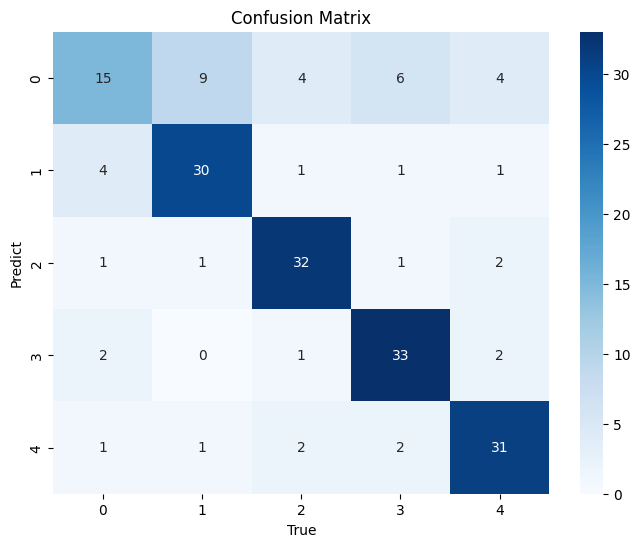

In [1080]:
# Menghitung Confusion Matrix untuk model K-Nearest Neighbors
cm = confusion_matrix(y_test, y_pred_knn)

# Membuat heatmap dari Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot
plt.show()

## Random Forest

In [1081]:
# Menginisialisasi model Random Forest dengan 100 pohon keputusan
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model menggunakan data train
rf_model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1082]:
# Melakukan prediksi menggunakan model Random Forest pada data test
y_pred_rf = rf_model1.predict(X_test)

# Menilai performa model Random Forest
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [1083]:
# Mengevaluasi performa model Random Forest menggunakan fungsi evaluasi
evaluation(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


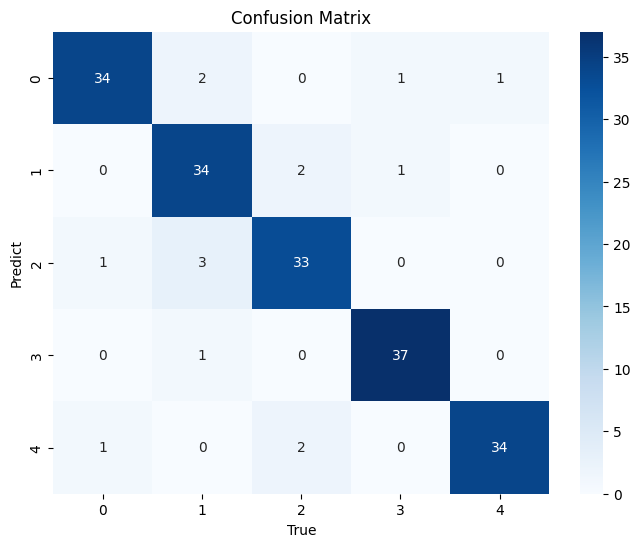

In [1084]:
# Menghitung Confusion Matrix untuk model Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

# Membuat heatmap dari Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot
plt.show()

## XGBoost

In [1085]:
# Menginisialisasi model XGBoost dengan learning rate 0.1, 100 pohon keputusan, dan seed 42
xgb_model1 = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

# Melatih model menggunakan data train
xgb_model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [1086]:
# Melakukan prediksi menggunakan model XGBoost pada data test
y_pred_xgb = xgb_model1.predict(X_test)

# Menilai performa model XGBoost
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb), 3)
print("Accuracy:", accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [1087]:
# Mengevaluasi performa model XGBoost menggunakan fungsi evaluasi
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


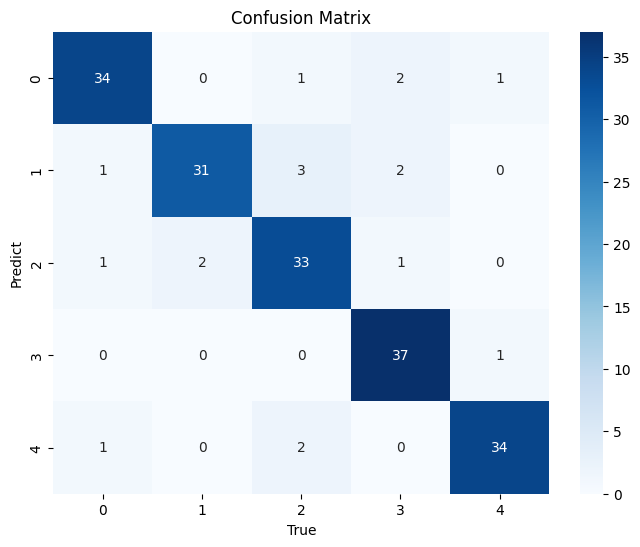

In [1088]:
# Menghitung Confusion Matrix untuk model XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)

# Membuat heatmap dari Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot
plt.show()

# **Oversample + Normalisasi**

## KNN

In [1089]:
knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [1090]:
# Melakukan prediksi menggunakan model K-Nearest Neighbors pada data test yang telah dinormalisasi
y_pred_knn = knn_model2.predict(X_test_normal)

# Menilai performa model K-Nearest Neighbors
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [1091]:
# Mengevaluasi performa model K-Nearest Neighbors pada data test yang telah dinormalisasi
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


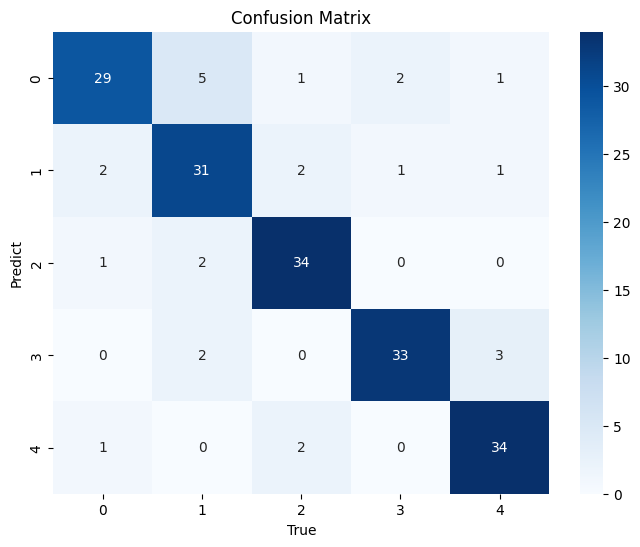

In [1092]:
# Menghitung Confusion Matrix untuk model K-Nearest Neighbors pada data test yang telah dinormalisasi
cm = confusion_matrix(y_test_normal, y_pred_knn)

# Membuat heatmap dari Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot
plt.show()

## Random Forest

In [1093]:
# Menginisialisasi model Random Forest dengan 100 pohon keputusan dan seed 42 pada data yang telah dinormalisasi
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model menggunakan data train yang telah dinormalisasi
rf_model2.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [1094]:
# Melakukan prediksi menggunakan model Random Forest pada data test yang telah dinormalisasi
y_pred_rf = rf_model2.predict(X_test_normal)

# Menilai performa model Random Forest
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [1095]:
# Mengevaluasi performa model Random Forest pada data test yang telah dinormalisasi
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


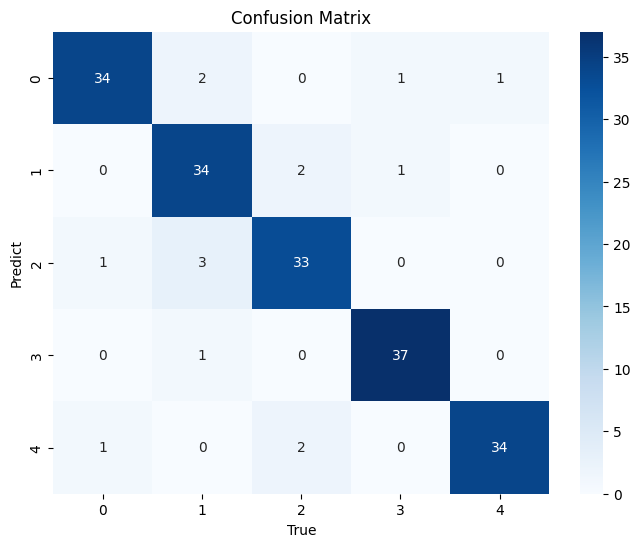

In [1096]:
# Menghitung Confusion Matrix untuk model Random Forest pada data test yang telah dinormalisasi
cm = confusion_matrix(y_test_normal, y_pred_rf)

# Membuat heatmap dari Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot
plt.show()

## XGBoost

In [1097]:
# Menginisialisasi model XGBoost dengan learning rate 0.1, 100 pohon keputusan, dan seed 42 pada data yang telah dinormalisasi
xgb_model2 = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

# Melatih model menggunakan data train yang telah dinormalisasi
xgb_model2.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [1098]:
# Melakukan prediksi menggunakan model XGBoost pada data test yang telah dinormalisasi
y_pred_xgb = xgb_model2.predict(X_test_normal)

# Menilai performa model XGBoost
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("Accuracy:", accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [1099]:
# Mengevaluasi performa model XGBoost pada data test yang telah dinormalisasi
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


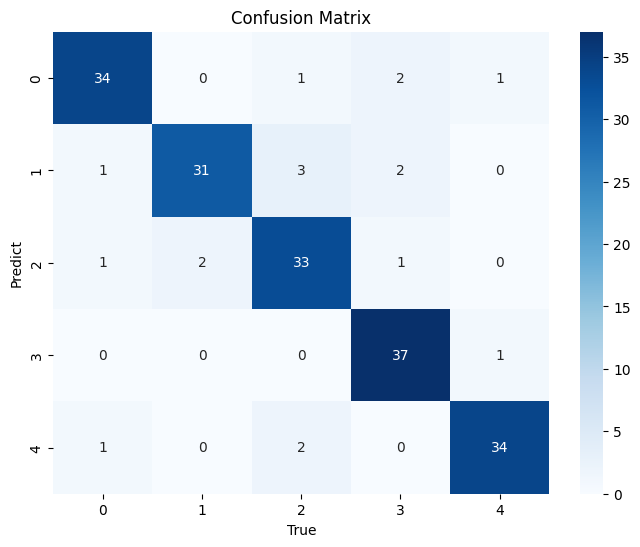

In [1100]:
# Menghitung Confusion Matrix untuk model XGBoost pada data test yang telah dinormalisasi
cm = confusion_matrix(y_test_normal, y_pred_xgb)

# Membuat heatmap dari Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot
plt.show()

# Tunning + Normalization + Oversample

In [1101]:
# Mengimpor fungsi RandomizedSearchCV dari modul model_selection dalam scikit-learn
from sklearn.model_selection import RandomizedSearchCV

## KNN

In [1102]:
# Menginisialisasi model K-Nearest Neighbors
knn_model3 = KNeighborsClassifier()

# Mendefinisikan grid parameter untuk pencarian acak (Randomized Search)
param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

In [1103]:
# Inisialisasi model Randomized Search untuk K-Nearest Neighbors
knn_model3 = RandomizedSearchCV(estimator=knn_model3, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

# Melatih model menggunakan data train yang telah dinormalisasi
knn_model3.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik dari hasil pencarian acak
best_params = knn_model3.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 58, 'algorithm': 'auto'}


In [1104]:
# Melakukan prediksi menggunakan model K-Nearest Neighbors (KNN) dengan parameter terbaik pada data test yang telah dinormalisasi
y_pred_knn = knn_model3.predict(X_test_normal)

# Menilai performa model K-Nearest Neighbors (KNN) yang telah dioptimalkan
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [1105]:
# Mengevaluasi performa model K-Nearest Neighbors (KNN) yang telah dioptimalkan pada data test yang telah dinormalisasi
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.923}


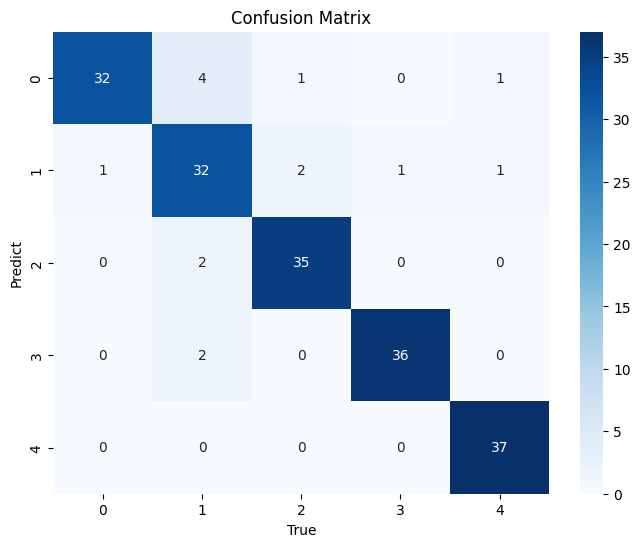

In [1106]:
# Menghitung confusion matrix untuk model K-Nearest Neighbors (KNN) yang telah dioptimalkan pada data test yang telah dinormalisasi
cm = confusion_matrix(y_test_normal, y_pred_knn)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot
plt.show()


## Random Forest

In [1107]:
# Menginisialisasi model Random Forest
rf_model3 = RandomForestClassifier()

# Mendefinisikan grid parameter untuk pencarian acak (Randomized Search)
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
}

In [1108]:
# Inisialisasi model Randomized Search untuk Random Forest
rf_model3 = RandomizedSearchCV(rf_model3, param_grid, n_iter=100, cv=5, n_jobs=-1)

# Melatih model menggunakan data train yang telah dinormalisasi
rf_model3.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik dari hasil pencarian acak
best_params = rf_model3.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [1109]:
# Melakukan prediksi menggunakan model Random Forest dengan parameter terbaik pada data test yang telah dinormalisasi
y_pred_rf = rf_model3.predict(X_test_normal)

# Menilai performa model Random Forest yang telah dioptimalkan
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.84      0.86      0.85        37
         2.0       0.86      0.86      0.86        37
         3.0       0.90      0.97      0.94        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [1110]:
# Mengevaluasi performa model Random Forest yang telah dioptimalkan pada data test yang telah dinormalisasi
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.905}


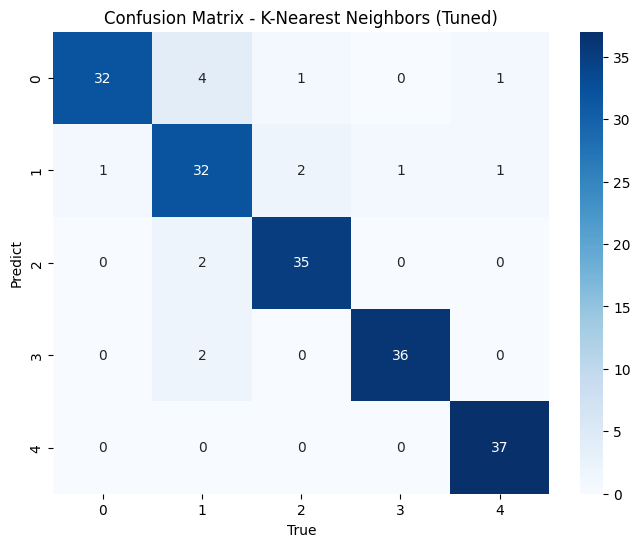

In [1111]:
# Menghitung confusion matrix untuk model K-Nearest Neighbors (KNN) yang telah dioptimalkan pada data test yang telah dinormalisasi
cm_knn_tuned = confusion_matrix(y_test_normal, y_pred_knn)

# Membuat heatmap dari confusion matrix KNN yang telah dioptimalkan
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_tuned, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - K-Nearest Neighbors (Tuned)')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot
plt.show()

## XGBoost

In [1164]:
# Menginisialisasi model XGBoost
xgb_model3 = XGBClassifier()

# Mendefinisikan grid parameter untuk pencarian acak (Randomized Search)
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

In [1165]:
# Inisialisasi model Randomized Search untuk XGBoost
xgb_model3 = RandomizedSearchCV(xgb_model3, param_grid, n_iter=10, cv=5, n_jobs=-1)

# Melatih model menggunakan data train yang telah dinormalisasi
xgb_model3.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik dari hasil pencarian acak
best_params = xgb_model3.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [1166]:
# Melakukan prediksi menggunakan model XGBoost dengan parameter terbaik pada data test yang telah dinormalisasi
y_pred_xgb = xgb_model3.predict(X_test_normal)

# Menilai performa model XGBoost yang telah dioptimalkan
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("Accuracy:", accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.89      0.84      0.86        37
         2.0       0.86      0.84      0.85        37
         3.0       0.88      1.00      0.94        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [1167]:
# Mengevaluasi performa model XGBoost yang telah dioptimalkan pada data test yang telah dinormalisasi
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precision score': 0.9}


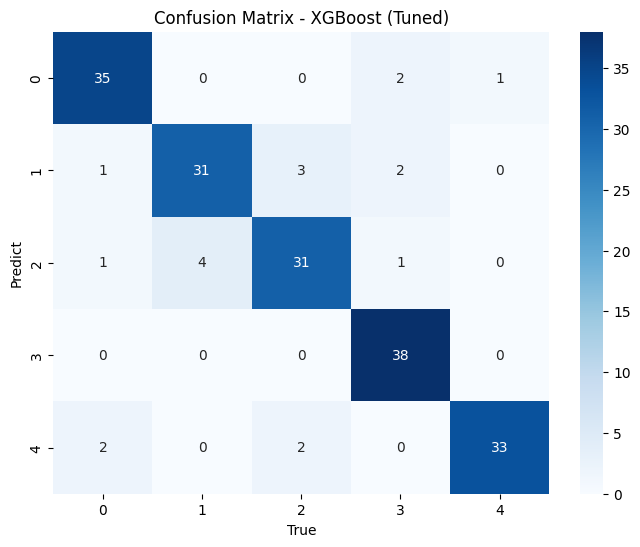

In [1168]:
# Menghitung confusion matrix untuk model XGBoost yang telah dioptimalkan pada data test yang telah dinormalisasi
cm_xgb_tuned = confusion_matrix(y_test_normal, y_pred_xgb)

# Membuat heatmap dari confusion matrix XGBoost yang telah dioptimalkan
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_tuned, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - XGBoost (Tuned)')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot
plt.show()

# **8) Evaluasi Model**

In [1170]:
# Membuat DataFrame untuk perbandingan akurasi model
model_comp1 = pd.DataFrame({
    'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_knn_smote * 100, accuracy_rf_smote * 100, accuracy_xgb_smote * 100]
})

# Menampilkan lima baris pertama dari DataFrame
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


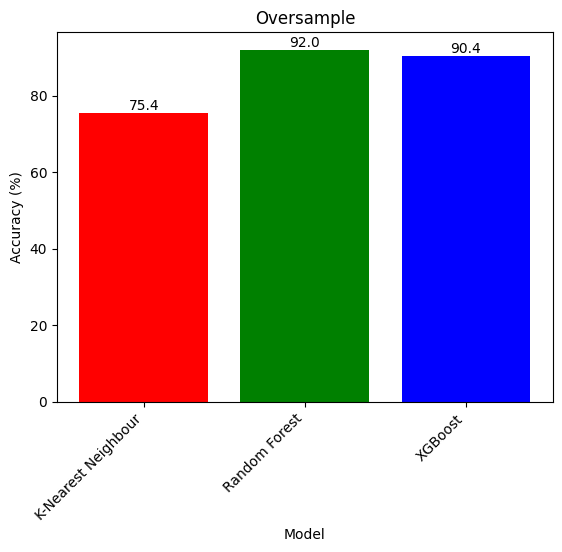

In [1171]:
# Membuat bar plot dengan keterangan jumlah di atas setiap bar
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menampilkan plot
plt.show()

In [1172]:
# Membuat DataFrame untuk perbandingan akurasi model setelah normalisasi
model_comp2 = pd.DataFrame({
    'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_knn_smote_normal * 100, accuracy_rf_smote_normal * 100, accuracy_xgb_smote_normal * 100]
})

# Menampilkan lima baris pertama dari DataFrame
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


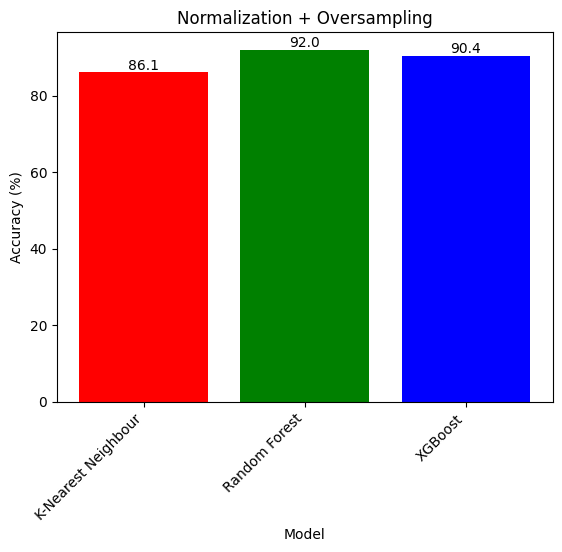

In [1173]:
# Membuat bar plot dengan keterangan jumlah di atas setiap bar
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menampilkan plot
plt.show()

In [1174]:
# Membuat DataFrame untuk perbandingan akurasi model setelah tuning
model_comp3 = pd.DataFrame({
    'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_knn_smote_normal_Tun * 100, accuracy_rf_smote_normal_Tun * 100, accuracy_xgb_smote_normal_Tun * 100]
})

# Menampilkan lima baris pertama dari DataFrame
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,90.4
2,XGBoost,89.8


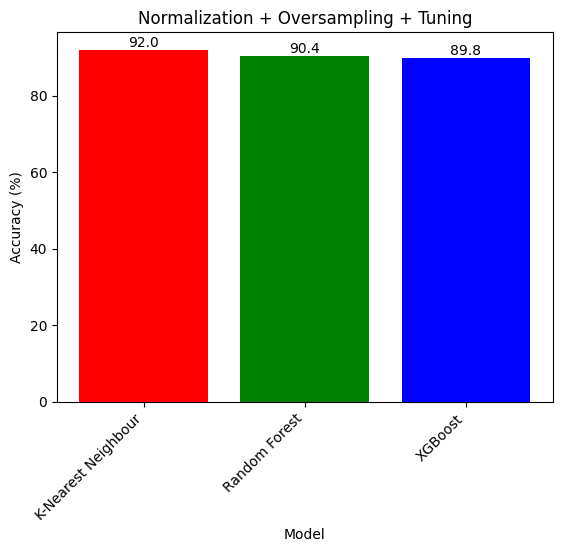

In [1175]:
# Membuat bar plot dengan keterangan jumlah di atas setiap bar
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tuning')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menampilkan plot
plt.show()

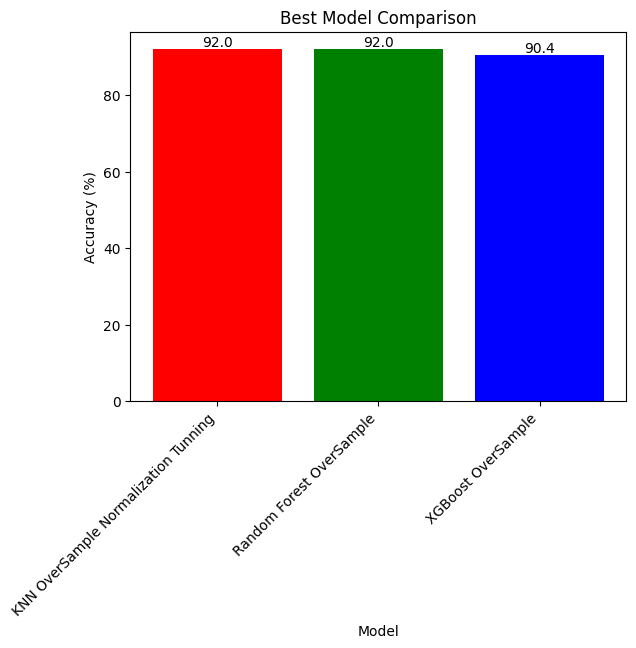

In [1182]:
# Membuat DataFrame untuk perbandingan akurasi model terbaik
model_compBest = pd.DataFrame({
    'Model': ['KNN OverSample Normalization Tunning', 'Random Forest OverSample', 'XGBoost OverSample'],
    'Accuracy': [accuracy_knn_smote_normal_Tun * 100, accuracy_rf_smote_normal * 100, accuracy_xgb_smote * 100]
})

# Membuat bar plot dengan keterangan jumlah di atas setiap bar
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menampilkan plot
plt.show()

# 9) Kesimpulan

Berdasarkan hasil penelitian, dapat disimpulkan bahwa penerapan teknik Oversample bersama dengan Normalisasi dan Tuning memberikan peningkatan kinerja pada model K-Nearest Neighbour, Random Forest, dan XGBoost. Pada model K-Nearest Neighbour hasil terbaik didapatkan ketika menggunakan OverSample Normalisasi Tunning dengan akurasi 92.0%, kemudian pada Random Forest hasil terbaik muncul di OverSample saja dengan akurasi 92.0%, yang terakhir ada XGBoost, pada XGBoost hasil terbaik sama halnya dengan Random Forest yaitu pada OverSample saja dengan hasil akurasi menunjukkan 90.4%

# Membuat Model Pickle

In [1183]:
import joblib

best_model = xgb_model1
model_filename = "xgb_oversample_model.pkl"
joblib.dump(best_model, model_filename)

print(f"Model telah disimpan dalam file {model_filename}")

Model telah disimpan dalam file xgb_oversample_model.pkl
